# Incident Management

## Exploratory Data Analysis Report - Pre-Closure

In [ ]:
# Library Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from win32com.client import Dispatch
import base64
from datetime import datetime 
import os


In [ ]:
# Load the dataset from a CSV file.
df = pd.read_csv('C:/DevProjects/DHL/IM_DataAnalysisReport/src/data/incident.csv')


In [ ]:
# Print the list of columns in the dataframe
#print(f'Lista de Colunas:\n{df.columns.tolist()}')
#print(f'Lista de Colunas:\n{df.columns}')
print(f'Lista de Colunas com tipos:\n{df.dtypes}')


Lista de Colunas com tipos:
number                                   object
caller_id                                object
u_incident_type                          object
impact                                   object
short_description                        object
u_impacted_area                          object
u_impacted_business_unit                 object
assignment_group                         object
assigned_to                              object
assigned_to.email                        object
u_site                                   object
u_reporting_level                        object
incident_state                           object
u_service                                object
u_service.u_accountmanager.email         object
u_service.owned_by.email                 object
u_resolution_sla.percentage             float64
opened_at                                object
u_accepted_at                            object
sys_updated_on                           object
u_target_res

In [ ]:
# Processing the dataset to convert columns to appropriate data types
def pre_process_dataset(df_processing):
    """ 
    Pre-process the dataset by converting columns to appropriate data types. 
    """
    date_formats = ['%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M', '%Y-%m-%d', '%d-%b-%Y']

    for column in df_processing.columns:
        if df_processing[column].dtype == 'object':
            if pd.to_numeric(df_processing[column], errors='coerce').notnull().all():
                df_processing[column] = pd.to_numeric(df_processing[column])
            else:
                for date_format in date_formats:
                    try:
                        df_processing[column] = pd.to_datetime(df_processing[column], format=date_format, errors='raise')
                        break
                    except ValueError:
                        continue
        elif df_processing[column].dtype == 'float64':
            continue
        elif df_processing[column].dtype == 'int64':
            df_processing[column] = df_processing[column].astype('int64')
        elif df_processing[column].dtype == 'bool':
            df_processing[column] = df_processing[column].astype('bool')
        elif pd.api.types.is_datetime64_any_dtype(df_processing[column]):
            for date_format in date_formats:
                try:
                    df_processing[column] = pd.to_datetime(df_processing[column], format=date_format, errors='raise')
                    break
                except ValueError:
                    continue
        else:
            df_processing[column] = df_processing[column].astype('object')

    return df_processing

# Apply the pre-processing function to the dataframe
df = pre_process_dataset(df)

In [ ]:
# Print the list of columns in the dataframe
print(f'Lista de Colunas com tipos:\n{df.dtypes}')

Lista de Colunas com tipos:
number                                          object
caller_id                                       object
u_incident_type                                 object
impact                                          object
short_description                               object
u_impacted_area                                 object
u_impacted_business_unit                        object
assignment_group                                object
assigned_to                                     object
assigned_to.email                               object
u_site                                          object
u_reporting_level                               object
incident_state                                  object
u_service                                       object
u_service.u_accountmanager.email                object
u_service.owned_by.email                        object
u_resolution_sla.percentage                    float64
opened_at                            

In [ ]:
# Clean up the dataset by converting columns to appropriate data types.
def cleanup_dataset(df_processing):
    """ 
    Clean up the dataset by converting columns to appropriate data types. 
    """
    df_data_proc = df_processing
    
    # The .ffill method is used in pandas to fill in missing values (NaN) in a DataFrame or Series.
    # It performs a forward fill, i.e. it fills the missing values with the last non-missing value previously found in the same column.
    #.ffill() or method='ffill' for forward fill (fill with the previous value).
    #.bfill() or method='bfill' for backward fill (fill with the next value).
    # Example of use:
    #                df_data_proc.ffill(inplace=True) or df_data_proc.bfill(inplace=True) 
    #                df_data_proc..fillna(method='ffill',inplace=True) or df_data_proc..fillna(method='bfill',inplace=True)

    # Remove duplicated records
    # df_data_proc.drop_duplicates(inplace=True)

    # Removes records with null values or missing
    # df_data_proc.dropna(inplace=True)
 
    # Fill missing values with appropriate strategies
    # For numeric columns, fill with the mean
    # Example of use:
    #       numeric_cols = df_data_proc.select_dtypes(include=['float64', 'int64']).columns
    #       df_data_proc[numeric_cols] = df_data_proc[numeric_cols].fillna(df_data_proc[numeric_cols].mean())

    # For categorical columns, fill with the mode
    # Example of use:
    #       categorical_cols = df_data_proc.select_dtypes(include=['object']).columns
    #       df_data_proc[categorical_cols] = df_data_proc[categorical_cols].fillna(df_data_proc[categorical_cols].mode().iloc[0])

    # For categorical columns, fill with a specific value
    categorical_cols = df_data_proc.select_dtypes(include=['object']).columns
    df_data_proc[categorical_cols] = df_data_proc[categorical_cols].fillna('(empty)')

    # For datetime columns, fill with the most recent date
    # Example of use:
    #       datetime_cols = df_data_proc.select_dtypes(include=['datetime64']).columns
    #       df_data_proc[datetime_cols] = df_data_proc[datetime_cols].fillna(df_data_proc[datetime_cols].max())
    
    
    return df_data_proc

# Clean up the dataset
df = cleanup_dataset(df)


In [ ]:
# Print the list of columns in the dataframe
#print(f'Lista de Colunas com tipos:\n{df.dtypes.tolist()}')
print(f'Lista de Colunas com tipos:\n{df.dtypes}')


Lista de Colunas com tipos:
number                                          object
caller_id                                       object
u_incident_type                                 object
impact                                          object
short_description                               object
u_impacted_area                                 object
u_impacted_business_unit                        object
assignment_group                                object
assigned_to                                     object
assigned_to.email                               object
u_site                                          object
u_reporting_level                               object
incident_state                                  object
u_service                                       object
u_service.u_accountmanager.email                object
u_service.owned_by.email                        object
u_resolution_sla.percentage                    float64
opened_at                            

In [ ]:
# Rename the columns in the dataframe
df.rename(columns={
    'number'                                : 'Number',
    'caller_id'                             : 'Caller',
    'u_incident_type'                       : 'Incident_Type',
    'impact'                                : 'Impact',
    'short_description'                     : 'Short_Description',
    'u_impacted_area'                       : 'Area',
    'u_impacted_business_unit'              : 'BU',
    'assignment_group'                      : 'Assignment_Group',
    'assignment_group.manager.email'        : 'AG_Manager_Email',
    'assigned_to'                           : 'Assigned',
    'assigned_to.email'                     : 'Assigned_Email',
    'u_site'                                : 'Site',
    'u_reporting_level'                     : 'Level',
    'incident_state'                        : 'Incident_State',
    'u_service'                             : 'Service',
    'u_service.u_accountmanager.email'      : 'Service_AccountManager_Email',
    'u_service.owned_by.email'              : 'Service_OwnedByEmail',
    'u_resolution_sla.percentage'           : 'SLA',
    'opened_at'                             : 'Opened',
    'u_accepted_at'                         : 'Accepted',
    'sys_updated_on'                        : 'Updated',
    'u_target_resolution_time'              : 'TRT',
    'u_supplier'                            : 'Supplier',
    'cmdb_ci'                               : 'CI_CMDB',
    'cmdb_ci.category'                      : 'CI_Category',
    'cmdb_ci.u_folder'                      : 'CI_Folder',
    'cmdb_ci.manufacturer'                  : 'CI_Manufacturer',
    'cmdb_ci.model_id'                      : 'CI_Model_ID',
    'cmdb_ci.model_number'                  : 'CI_Model_Number',
    'cmdb_ci.serial_number'                 : 'CI_Serial_Number',
    'cmdb_ci.asset_tag'                     : 'CI_Asset_Tag',
    'u_complaint_reason'                    : 'Complaint_Reason',
    'reassignment_count'                    : 'Reassignment_Count',
    'u_reassign_reason'                     : 'Reassign_Reason',
    'reopen_count'                          : 'Reopen_Count',
    'u_date_worked'                         : 'Date_Worked',
    'u_effort_service'                      : 'Effort_Service',
    'u_time_worked_total'                   : 'Time_Worked_Total',
    'u_resolution_sla.duration'             : 'SLA_Duration',
    'u_resolution_sla.business_percentage'  : 'SLA_Business_Percentage',
}, inplace=True)


In [ ]:
# Data Calculate

def date_calculate(df_processing):
    """
    Calculate the difference between the date of the incident and the date of the report.
    """
    df_data_proc = df_processing

    # Force convert datetime columns to datetime data type
    #df_data_proc['Opened']  = pd.to_datetime(df_data_proc['Opened'])
    #df_data_proc['Updated'] = pd.to_datetime(df_data_proc['Updated'])
    #df_data_proc['TRT']     = pd.to_datetime(df_data_proc['TRT'])

    # Get the current date
    now = datetime.now()

    # Calculate the difference between the date of the incident and the date of the report
    df_data_proc['Days_Since_Opened']   = (now - df_data_proc['Opened']).dt.days
    df_data_proc['Days_Since_Updated']  = (now - df_data_proc['Updated']).dt.days
    df_data_proc['Days_Until_TRT']      = (df_data_proc['TRT'] - now).dt.days

    return df_processing

# Apply the date calculation function to the dataframe
df = date_calculate(df)


In [ ]:
# Test Now()
now = datetime.now()
print(f'Current Date: {now}')

Current Date: 2024-11-12 13:55:42.250220


In [ ]:
# pritn the list of columns in the dataframe
print(df.columns.tolist())

['Number', 'Caller', 'Incident_Type', 'Impact', 'Short_Description', 'Area', 'BU', 'Assignment_Group', 'Assigned', 'Assigned_Email', 'Site', 'Level', 'Incident_State', 'Service', 'Service_AccountManager_Email', 'Service_OwnedByEmail', 'SLA', 'Opened', 'Accepted', 'Updated', 'TRT', 'Supplier', 'CI_CMDB', 'CI_Category', 'CI_Folder', 'CI_Manufacturer', 'CI_Model_ID', 'CI_Model_Number', 'CI_Serial_Number', 'CI_Asset_Tag', 'Complaint_Reason', 'Reassignment_Count', 'Reassign_Reason', 'Reopen_Count', 'Date_Worked', 'Effort_Service', 'Time_Worked_Total', 'SLA_Duration', 'SLA_Business_Percentage', 'Days_Since_Opened', 'Days_Since_Updated', 'Days_Until_TRT']


In [ ]:
# customising_order_of_columns(df, 'incident_view')

def customising_order_of_columns(df_processing, format_view):
    """ Format the columns list according to the view selected. """

    if format_view == None:
        columns_list = df_processing[df_processing.columns.tolist()].copy()

    elif format_view == "incident_view":
        columns_list = df_processing[['Number', 'Opened', 'Service', 'Area', 'BU', 'Caller', 'Assignment_Group', 'Assigned', 'Incident_Type', 'Impact', 'Updated']].copy()

    elif format_view == "incident_type_impact_view":
        columns_list = df_processing[['Number', 'Opened', 'Incident_Type', 'Impact', 'Area', 'BU', 'Caller', 'Service', 'Assignment_Group', 'Assigned', 'Updated']].copy()

    elif format_view == "ci_view":
        columns_list = df_processing[['Number', 'Opened', 'Incident_Type', 'Impact', 'Area', 'BU', 'Caller', 'Service', 'Assigned', 'CI_CMDB', 'Updated']].copy()

    elif format_view == "supplier_view":
        columns_list = df_processing[['Number', 'Opened', 'Incident_Type', 'Impact', 'Area', 'BU', 'Service', 'Incident_State', 'Supplier', 'CI_CMDB', 'CI_Category', 'CI_Folder', 'CI_Model_ID','Updated']].copy()

    elif format_view == "impact_view":
        columns_list = df_processing[['Number', 'Opened', 'Service', 'Area', 'BU', 'Caller', 'Assignment_Group', 'Assigned', 'Incident_Type', 'Impact', 'Updated']].copy()

    return columns_list


In [ ]:
# convert_category_data_to_discrete_data(df)

def convert_category_data_to_discrete_data(df_processing):
    """
    Converts categorical data to discrete data by applying factorization.
    Returns:
    None
    """
    df_data_proc = df_processing.copy()
    #df_data_proc['incident_state_disc'], uniques   = pd.factorize(df_data_proc['Incident_State'])
    #df_data_proc['caller_disc'], uniques           = pd.factorize(df_data_proc['Caller'])
    #df_data_proc['site_disc'], uniques             = pd.factorize(df_data_proc['Site'])
    #df_data_proc['assignment_group_disc'], uniques = pd.factorize(df_data_proc['Assignment_Group'])
    #df_data_proc['incident_type_disc'], uniques    = pd.factorize(df_data_proc['Incident_Type'])
    #df_data_proc['impact_disc'], uniques           = pd.factorize(df_data_proc['Impact'])
    #df_data_proc['bu_disc'], uniques               = pd.factorize(df_data_proc['BU'])
    #df_data_proc['supplier_disc'], uniques         = pd.factorize(df_data_proc['Supplier'])    
    return df_data_proc

df_describe = convert_category_data_to_discrete_data(df)



In [ ]:
print(df.dtypes)

Number                                  object
Caller                                  object
Incident_Type                           object
Impact                                  object
Short_Description                       object
Area                                    object
BU                                      object
Assignment_Group                        object
Assigned                                object
Assigned_Email                          object
Site                                    object
Level                                   object
Incident_State                          object
Service                                 object
Service_AccountManager_Email            object
Service_OwnedByEmail                    object
SLA                                    float64
Opened                          datetime64[ns]
Accepted                        datetime64[ns]
Updated                         datetime64[ns]
TRT                             datetime64[ns]
Supplier     

### 1.0 - Heatmap for correlation analysis between Incident Types and Impact

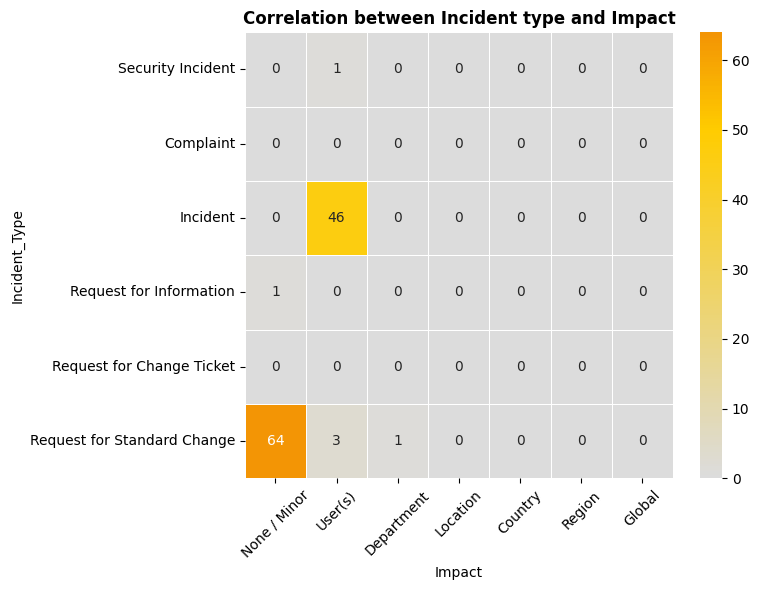

In [ ]:
# 1.0 - Heatmap for correlation analysis between Incident Types and Impact

label_incident_type_order = ['Security Incident','Complaint','Incident', 'Request for Information','Request for Change Ticket','Request for Standard Change']
label_impact_order = ['None / Minor', 'User(s)','Department','Location','Country','Region','Global']

cmap = LinearSegmentedColormap.from_list("custom_cmap",["#DCDCDC", "#FFCC00", "#D40511"])

matrix_incident_type_w_impact = pd.crosstab(df['Incident_Type'], df['Impact']).reindex(index=label_incident_type_order, columns=label_impact_order, fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_incident_type_w_impact, annot=True, cmap=cmap, center=50, linewidths=0.5, fmt=".0f")    
plt.title('Correlation between Incident type and Impact').set_weight('bold')
plt.xlabel('Impact').set_animated(True)
plt.ylabel('Incident_Type')
plt.xticks(rotation=45)
plt.tight_layout()
    
#plt.savefig('./src/output/html_element_1_0.png', dpi=150)
plt.show()


In [ ]:
# 1.1 - Report listing the incident type filtered as "Incident" and the impact filtered as "None / Minor".

df_1_1 = df[(df['Incident_Type'] == 'Incident') & (df['Impact'] == 'None / Minor')].sort_values(by=['Area', 'BU', 'Assignment_Group', 'Assigned'])
df_1_1 = customising_order_of_columns(df_1_1, 'incident_type_impact_view')
df_1_1.head(20) #.to_html('./src/output/html_element_1_1.html', index=False)



,Number,Opened,Incident_Type,Impact,Area,BU,Caller,Service,Assignment_Group,Assigned,Updated


In [ ]:
# 1.2 - Report listing the incident type filtered as "Request for ..." and the impact filtered as different of "None / Minor"

df_1_2 = df[(df['Incident_Type'].str.startswith("Request for", na=False)) & (df['Impact'] != "None / Minor")].sort_values(by=['Area', 'BU', 'Assignment_Group', 'Assigned'])
df_1_2 = customising_order_of_columns(df_1_2, 'incident_type_impact_view') 
df_1_2.head(20) #.to_html('./src/output/html_element_1_2.html', index=False)



,Number,Opened,Incident_Type,Impact,Area,BU,Caller,Service,Assignment_Group,Assigned,Updated
112,INC61650666,2024-11-12 08:05:56,Request for Standard Change,User(s),BR,DSC,Victor Silva De Andrade,MDS,AMER-ITS-BR-FieldSupport,Lucas Aparecido Ferreira,2024-11-12 08:21:01
93,INC61639560,2024-11-11 16:40:12,Request for Standard Change,User(s),BR,DSC,Pamela Goncalves Chaves,DESKTOP SUPPORT DSC LATAM,AMER-ITS-BR-FieldSupport,Ricardo Dias Almeida,2024-11-11 17:34:09
43,INC61639259,2024-11-11 16:21:27,Request for Standard Change,Department,BR,Express,Gabriella Silva,DESKTOP SUPPORT EXP LATAM,AMER-ITS-BR-FieldSupport,Rick Souza,2024-11-12 08:36:10
96,INC61585987,2024-11-07 04:48:59,Request for Standard Change,User(s),CL,DSC,Punitha Vengidasalam,EXP TR END USER SUPPORT SERVICE,AMER-ITS-CL-EUS-Chile,Pedro Acevedo,2024-11-12 11:14:15


### 2.0 - Heatmap for correlation analysis between Impacted Service and Impacted BU

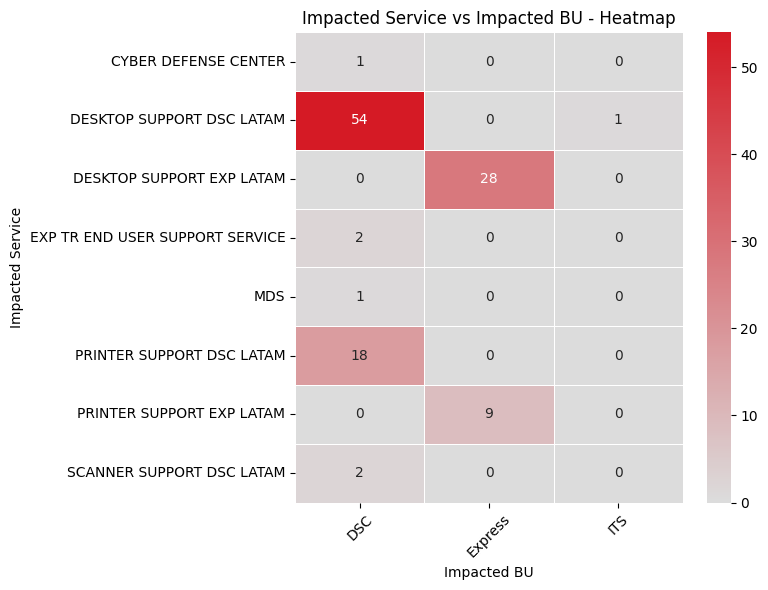

In [ ]:
# 2.0 - Heatmap for correlation analysis between Impacted Service and Impacted BU.
cmap = LinearSegmentedColormap.from_list("custom_cmap",["#DCDCDC", "#D40511"])
cross_tab = pd.crosstab(df['Service'], df['BU'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap=cmap, center=30, linewidths=0.5, fmt=".0f")
plt.title('Impacted Service vs Impacted BU - Heatmap')
plt.xlabel('Impacted BU').set_animated(True)
plt.ylabel('Impacted Service')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('./src/output/html_element_2_0.png', dpi=150)
plt.show()

In [ ]:
# 2.1 - Report that lists the incidents in which the Service does not contain the word "...LATAM".

df_2_1 = df[~df['Service'].str.contains(" LATAM", regex=False, na=False)].sort_values(by=['Area', 'BU', 'Assignment_Group', 'Assigned'])
df_2_1 = customising_order_of_columns(df_2_1, 'incident_type_impact_view')
df_2_1.head(20) #.to_html('./src/output/html_element_2_1.html', index=False)   



,Number,Opened,Incident_Type,Impact,Area,BU,Caller,Service,Assignment_Group,Assigned,Updated
13,INC61599307,2024-11-08 00:02:29,Security Incident,User(s),BR,DSC,Cyber Defense Center,CYBER DEFENSE CENTER,AMER-ITS-BR-FieldSupport,Claudinei Marques,2024-11-08 10:41:41
112,INC61650666,2024-11-12 08:05:56,Request for Standard Change,User(s),BR,DSC,Victor Silva De Andrade,MDS,AMER-ITS-BR-FieldSupport,Lucas Aparecido Ferreira,2024-11-12 08:21:01
97,INC61585909,2024-11-07 04:43:50,Request for Standard Change,None / Minor,BR,DSC,Punitha Vengidasalam,EXP TR END USER SUPPORT SERVICE,AMER-ITS-BR-FieldSupport,Ricardo Dias Almeida,2024-11-12 11:20:31
96,INC61585987,2024-11-07 04:48:59,Request for Standard Change,User(s),CL,DSC,Punitha Vengidasalam,EXP TR END USER SUPPORT SERVICE,AMER-ITS-CL-EUS-Chile,Pedro Acevedo,2024-11-12 11:14:15


In [ ]:
# 2.2 - Report that lists the incidents in which the Service is "DESKTOP SUPPORT DSC LATAM" and the BU is different from "DSC".

df_2_2 = df[(df['Service'] == "DESKTOP SUPPORT DSC LATAM") & (df['BU'] != "DSC")].sort_values(by=['Area', 'BU', 'Assignment_Group', 'Assigned'])
df_2_2 = customising_order_of_columns(df_2_2, 'incident_type_impact_view')
df_2_2.head(20) #.to_html('./src/output/html_element_2_2.html', index=False)   




,Number,Opened,Incident_Type,Impact,Area,BU,Caller,Service,Assignment_Group,Assigned,Updated
2,INC61549452,2024-11-05 03:16:06,Request for Standard Change,None / Minor,BR,ITS,Azlina Wee Zulkarnain,DESKTOP SUPPORT DSC LATAM,AMER-ITS-BR-FieldSupport,Lucas Aparecido Ferreira,2024-11-11 18:02:24


In [ ]:
# 2.3 - Report that lists the incidents in which the Service is "DESKTOP SUPPORT EXP LATAM" and the BU is different from "Express".

df_2_3 = df[(df['Service'] == "DESKTOP SUPPORT EXP LATAM") & (df['BU'] != "Express")].sort_values(by=['Area', 'BU', 'Assignment_Group', 'Assigned'])
df_2_3 = customising_order_of_columns(df_2_3, 'incident_type_impact_view')
df_2_3.head(20) #.to_html('./src/output/html_element_2_3.html', index=False)   


,Number,Opened,Incident_Type,Impact,Area,BU,Caller,Service,Assignment_Group,Assigned,Updated


### 3.0 - Heatmap for correlation analysis between Assigned Group and Impacted Service

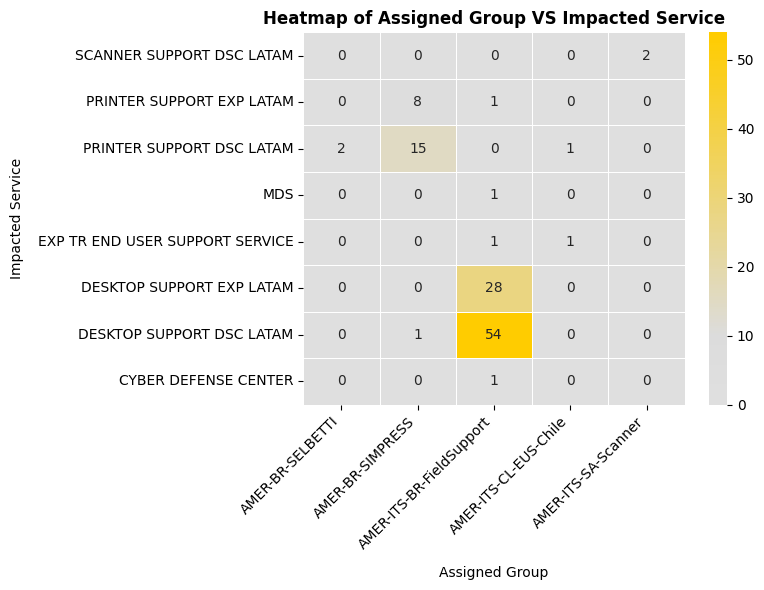

In [ ]:
# 3.0 - Heatmap for correlation analysis between Assigned Group and Impacted Service

cmap = LinearSegmentedColormap.from_list("custom_cmap",[ '#EBEBEB', '#DCDCDC', '#FFCC00'])

grouped_data = df.groupby(['Service', 'Assignment_Group']).size().unstack(fill_value=0)
grouped_data = grouped_data.sort_values(by='Service', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data, annot=True, cmap=cmap, center=10, linewidths=0.5, fmt=".0f")

plt.title('Heatmap of Assigned Group VS Impacted Service').set_weight('bold')
plt.xlabel('Assigned Group', labelpad=10)
plt.ylabel('Impacted Service', labelpad=10).set_animated(True)
plt.xticks(rotation=45)
plt.tight_layout()

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_horizontalalignment('right')
    tick.set_x(tick.get_position()[0] - 1)

#plt.savefig('./src/output/html_element_3_0.png', dpi=150)
plt.show()

In [ ]:
# 3.1 - Report listing the number of incidents by Area, BU and Assigned Group

df_3_1 = df.groupby(['Area', 'BU', 'Assigned']).agg(Number_Count=('Number', 'count')).reset_index()
df_3_1.index = df_3_1.index + 1
df_3_1 = df_3_1.sort_values(['Area', 'Assigned', 'BU'])
df_3_1.head(len(df)) #.to_html('./src/output/html_element_3_1.html')




,Area,BU,Assigned,Number_Count
1,BR,DSC,(empty),7
2,BR,DSC,Arthur da Fonseca Junior,10
14,BR,Express,Arthur da Fonseca Junior,6
3,BR,DSC,Carlos Antonio Gomes Silva,5
4,BR,DSC,Carlos Montana,1
5,BR,DSC,Claudinei Marques,6
6,BR,DSC,Daniel Gracioso Justino,3
15,BR,Express,Daniel Gracioso Justino,1
16,BR,Express,Davi Soares de Oliveira Junior,1
7,BR,DSC,Eduarda Fernanda Vincenzi,3


In [ ]:
# 3.2 - Report listing the number of incidents by Area, BU and Assignment_Group 

df_3_2 = df.groupby(['Area', 'BU', 'Assignment_Group']).agg(Number_Count=('Number', 'count')).reset_index()
df_3_2.index = df_3_2.index + 1
df_3_2 = df_3_2.sort_values(['Area', 'Assignment_Group', 'BU'])
df_3_2.head(len(df)) #.to_html('./src/output/html_element_3_2.html')


,Area,BU,Assignment_Group,Number_Count
1,BR,DSC,AMER-BR-SELBETTI,2
2,BR,DSC,AMER-BR-SIMPRESS,16
5,BR,Express,AMER-BR-SIMPRESS,8
3,BR,DSC,AMER-ITS-BR-FieldSupport,56
6,BR,Express,AMER-ITS-BR-FieldSupport,29
7,BR,ITS,AMER-ITS-BR-FieldSupport,1
4,BR,DSC,AMER-ITS-SA-Scanner,1
8,CL,DSC,AMER-ITS-CL-EUS-Chile,2
9,CL,DSC,AMER-ITS-SA-Scanner,1


### 4.0 - The field "Configuration Item" as Null value or "NoRecord". 

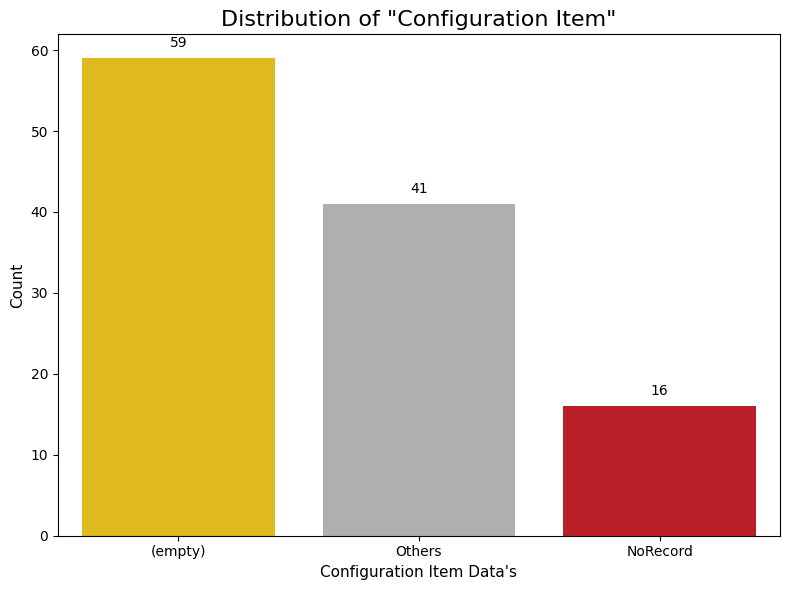

In [ ]:
# 4.0 - The Configuration Item field as ‘(empty)’, ‘NoRecord’ or other value.. 

df['CI_CMDB_Status'] = df['CI_CMDB'].apply(lambda x: 'NoRecord' if x == 'NORECORD' else ('(empty)' if x == '(empty)' else 'Others'))
config_item_counts = df['CI_CMDB_Status'].value_counts()
custom_colors = ['#FFCC00', '#AFAFAF', '#D40511'] 
plt.figure(figsize=(8, 6))
sns.barplot(x=config_item_counts.index, y=config_item_counts.values, hue=config_item_counts.index, palette=custom_colors, legend=False)
plt.title('Distribution of "Configuration Item"', fontsize=16)
plt.xlabel("Configuration Item Data's", fontsize=11)
plt.ylabel('Count', fontsize=11)
for i, value in enumerate(config_item_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
#plt.savefig('./src/output/html_element_4_0.png', dpi=150)
plt.show()

In [ ]:
# 4.1 Report listing the incidents in which the Configuration Item is null.

df_4_1 = df[df['CI_CMDB'] == '(empty)']
df_4_1 = customising_order_of_columns(df_4_1, 'ci_view').sort_values(by=['Area', 'BU', 'Service', 'Assigned'])
df_4_1.head(20) #.to_html('./src/output/html_element_4_1.html', index=False)



,Number,Opened,Incident_Type,Impact,Area,BU,Caller,Service,Assigned,CI_CMDB,Updated
28,INC61657170,2024-11-12 12:34:43,Incident,User(s),BR,DSC,Felipe Fernandes Da Silva,DESKTOP SUPPORT DSC LATAM,(empty),(empty),2024-11-12 12:34:44
39,INC61656429,2024-11-12 11:57:20,Incident,User(s),BR,DSC,Gabriel Barboza Lemos,DESKTOP SUPPORT DSC LATAM,(empty),(empty),2024-11-12 11:57:22
113,INC61632988,2024-11-11 09:13:20,Incident,User(s),BR,DSC,Wara Maria Novais Baltazar,DESKTOP SUPPORT DSC LATAM,(empty),(empty),2024-11-12 08:58:06
0,INC61081319,2024-09-30 16:19:50,Incident,User(s),BR,DSC,Ana Carolina Baldoino de Sousa,DESKTOP SUPPORT DSC LATAM,Carlos Antonio Gomes Silva,(empty),2024-11-12 08:33:00
52,INC61639700,2024-11-11 16:52:58,Incident,User(s),BR,DSC,Gilmara Feitoza Barbosa,DESKTOP SUPPORT DSC LATAM,Carlos Antonio Gomes Silva,(empty),2024-11-12 09:12:56
100,INC61656017,2024-11-12 11:35:45,Incident,User(s),BR,DSC,Ricardo Henrique Silva Dos Santos,DESKTOP SUPPORT DSC LATAM,Carlos Antonio Gomes Silva,(empty),2024-11-12 12:29:11
72,INC61607468,2024-11-08 10:58:39,Incident,User(s),BR,DSC,Lincon Silva,DESKTOP SUPPORT DSC LATAM,Claudinei Marques,(empty),2024-11-08 11:48:20
78,INC61651720,2024-11-12 08:51:13,Incident,User(s),BR,DSC,Luiz Fernando Lucas Mora,DESKTOP SUPPORT DSC LATAM,Claudinei Marques,(empty),2024-11-12 08:52:21
92,INC61632867,2024-11-11 09:07:47,Request for Standard Change,None / Minor,BR,DSC,Neildes De Souza,DESKTOP SUPPORT DSC LATAM,Claudinei Marques,(empty),2024-11-11 16:02:35
40,INC61639347,2024-11-11 16:30:11,Incident,User(s),BR,DSC,Gabriel Dutra Menegussi,DESKTOP SUPPORT DSC LATAM,Matheus Carvalho Reis,(empty),2024-11-12 08:42:05


In [ ]:
# 4.2 Report listing the incidents in which the Configuration Item is null.

df_4_2 = df[df['CI_CMDB'] == 'NORECORD']
df_4_2 = customising_order_of_columns(df_4_2, 'ci_view').sort_values(by=['Area', 'BU', 'Service', 'Assigned'])
df_4_2.head(20) #.to_html('./src/output/html_element_4_2.html', index=False)


,Number,Opened,Incident_Type,Impact,Area,BU,Caller,Service,Assigned,CI_CMDB,Updated
86,INC61576805,2024-11-06 11:46:44,Request for Standard Change,None / Minor,BR,DSC,Matheus De Souza Freitas,DESKTOP SUPPORT DSC LATAM,Lucas Aparecido Ferreira,NORECORD,2024-11-11 18:01:12
89,INC61559462,2024-11-05 11:58:05,Request for Standard Change,None / Minor,BR,DSC,Matheus De Souza Freitas,DESKTOP SUPPORT DSC LATAM,Lucas Aparecido Ferreira,NORECORD,2024-11-11 17:59:43
90,INC61559465,2024-11-05 11:58:12,Request for Standard Change,None / Minor,BR,DSC,Matheus De Souza Freitas,DESKTOP SUPPORT DSC LATAM,Lucas Aparecido Ferreira,NORECORD,2024-11-11 18:00:26
87,INC61638581,2024-11-11 15:12:49,Request for Standard Change,None / Minor,BR,DSC,Matheus De Souza Freitas,DESKTOP SUPPORT DSC LATAM,Matheus Carvalho Reis,NORECORD,2024-11-12 07:55:55
88,INC61577788,2024-11-06 12:52:20,Request for Standard Change,None / Minor,BR,DSC,Matheus De Souza Freitas,DESKTOP SUPPORT DSC LATAM,Matheus Carvalho Reis,NORECORD,2024-11-11 17:20:17
26,INC61595844,2024-11-07 15:36:05,Request for Standard Change,None / Minor,BR,DSC,Elton Luan Monteiro Ferreira,DESKTOP SUPPORT DSC LATAM,Rafael Aguillar,NORECORD,2024-11-07 15:55:49
29,INC61589894,2024-11-07 08:31:30,Request for Standard Change,None / Minor,BR,DSC,Felipe Fernandes Da Silva,DESKTOP SUPPORT DSC LATAM,Rafael Aguillar,NORECORD,2024-11-11 17:10:08
50,INC61577081,2024-11-06 12:04:38,Request for Standard Change,None / Minor,BR,DSC,Geanderson Silva,DESKTOP SUPPORT DSC LATAM,Rafael Aguillar,NORECORD,2024-11-06 12:14:07
59,INC61633572,2024-11-11 09:49:13,Request for Standard Change,None / Minor,BR,DSC,Jhonatan Fernando Correa Ribas,DESKTOP SUPPORT DSC LATAM,Rafael Aguillar,NORECORD,2024-11-11 11:33:32
60,INC61633666,2024-11-11 09:54:09,Request for Standard Change,None / Minor,BR,DSC,Jhonatan Fernando Correa Ribas,DESKTOP SUPPORT DSC LATAM,Rafael Aguillar,NORECORD,2024-11-11 10:12:29


### 5.0 - Timeline of Incident Status: Status categories as ('Pending Supplier', 'Pending Customer', and 'In Progress') by last update.

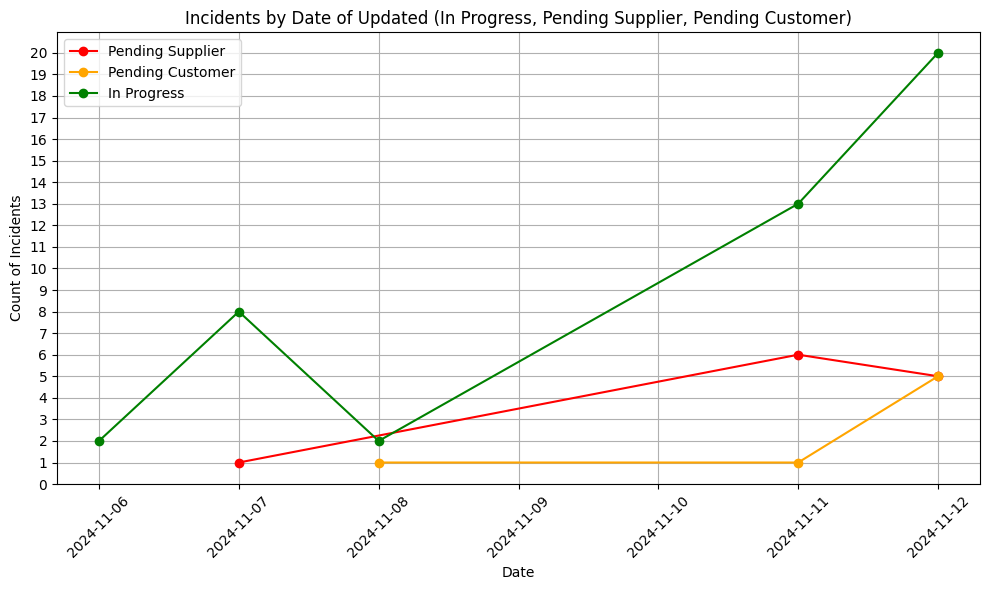

In [ ]:
# 5.0 - Timeline of Incident Status: Status categories as ('Pending Supplier', 'Pending Customer', and 'In Progress') by last update.

# Plot the number of incidents by date for each state
df['Updated'] = pd.to_datetime(df['Updated'])

# Filtrar os dados para os estados "Pending Supplier" e "Pending Customer"
pending_supplier_df = df[df['Incident_State'] == "Pending Supplier"]
pending_customer_df = df[df['Incident_State'] == "Pending Customer"]
in_progress_df      = df[df['Incident_State'] == "In Progress"]

# Contar a quantidade de incidentes por dia para cada estado
pending_supplier_counts = pending_supplier_df.groupby(pending_supplier_df['Updated'].dt.date).size().sort_index()
pending_customer_counts = pending_customer_df.groupby(pending_customer_df['Updated'].dt.date).size().sort_index()
in_progress_counts      = in_progress_df.groupby(in_progress_df['Updated'].dt.date).size().sort_index()


# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(pending_supplier_counts.index, pending_supplier_counts.values, label='Pending Supplier', marker='o', color='red')
plt.plot(pending_customer_counts.index, pending_customer_counts.values, label='Pending Customer', marker='o', color='orange')
plt.plot(in_progress_counts.index, in_progress_counts.values, label='In Progress', marker='o', color='green')

plt.title('Incidents by Date of Updated (In Progress, Pending Supplier, Pending Customer)')
plt.xlabel('Date')
plt.ylabel('Count of Incidents')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Ajustar a escala do eixo y para ir de 1 em 1
max_count = max(pending_supplier_counts.max(), pending_customer_counts.max(), in_progress_counts.max())
plt.yticks(range(0, max_count + 1, 1))

plt.tight_layout()
#plt.savefig('./output_data/html_element_5_0.png', dpi=150)
plt.show()



In [ ]:
# 5.1 - Report listing the incidents in which the State is "Pending Supplier" and the Supplier is equal '(empty)'

df_5_1 = df[(df['Incident_State'] == "Pending Supplier") & (df['Supplier'] == "(empty)")].sort_values(by=['Area', 'BU', 'Service', 'CI_Model_ID'])
df_5_1 = customising_order_of_columns(df_5_1, 'supplier_view')
df_5_1.head(20) #.to_html('./src/output/html_element_5_1.html', index=False)


,Number,Opened,Incident_Type,Impact,Area,BU,Service,Incident_State,Supplier,CI_CMDB,CI_Category,CI_Folder,CI_Model_ID,Updated
98,INC61458059,2024-10-28 16:06:28,Incident,User(s),BR,DSC,DESKTOP SUPPORT DSC LATAM,Pending Supplier,(empty),BRIDUWN3094970,Laptop/Notebook,ITS LATAM,Lenovo ThinkPad T14 Gen 2 i,2024-11-11 18:06:50
16,INC61579805,2024-11-06 16:03:07,Incident,User(s),BR,Express,PRINTER SUPPORT EXP LATAM,Pending Supplier,(empty),BR-PRLS-AS1602541,Laser Printer,EXP BR,HP LaserJet M506DN,2024-11-11 08:50:52


In [ ]:
# 5.2 - Report listing the incidents in which the State is "Pending Supplier" and the Supplier is not '(empty)'

df_5_2 = df[(df['Incident_State'] == "Pending Supplier") & (df['Supplier'] != "(empty)")].sort_values(by=['Area', 'BU', 'Service', 'Supplier', 'CI_Model_ID'])
df_5_2 = customising_order_of_columns(df_5_2, 'supplier_view')
df_5_2.head(20) #.to_html('./src/output/html_element_5_2.html', index=False)



,Number,Opened,Incident_Type,Impact,Area,BU,Service,Incident_State,Supplier,CI_CMDB,CI_Category,CI_Folder,CI_Model_ID,Updated
54,INC61595373,2024-11-07 14:36:03,Incident,User(s),BR,DSC,DESKTOP SUPPORT DSC LATAM,Pending Supplier,DELL,BRJUNWN3090829,Laptop/Notebook,ITS LATAM,Dell Latitude 5420,2024-11-12 08:20:24
0,INC61081319,2024-09-30 16:19:50,Incident,User(s),BR,DSC,DESKTOP SUPPORT DSC LATAM,Pending Supplier,DELL BRAZIL,(empty),(empty),(empty),(empty),2024-11-12 08:33:00
56,INC61651318,2024-11-12 08:34:47,Incident,User(s),BR,DSC,DESKTOP SUPPORT DSC LATAM,Pending Supplier,DELL BRAZIL,BRBRIWN3125117,Laptop/Notebook,ITS LATAM,Dell Latitude 5420,2024-11-12 10:37:03
115,INC61543542,2024-11-04 14:17:11,Incident,User(s),BR,DSC,DESKTOP SUPPORT DSC LATAM,Pending Supplier,LENOVO BRAZIL,BRLOAWN3086458,Laptop/Notebook,ITS LATAM,Lenovo ThinkPad P16s Gen 2,2024-11-11 10:49:10
79,INC61609575,2024-11-08 13:50:34,Request for Standard Change,None / Minor,BR,DSC,DESKTOP SUPPORT DSC LATAM,Pending Supplier,LENOVO BRAZIL,BRLOZWN3088206,Laptop/Notebook,ITS LATAM,Lenovo ThinkPad T14 Gen 1,2024-11-11 17:29:01
5,INC61555964,2024-11-05 09:00:24,Incident,User(s),BR,DSC,DESKTOP SUPPORT DSC LATAM,Pending Supplier,LENOVO BRAZIL,BRGRUWN3132204,Laptop/Notebook,ITS LATAM,Lenovo ThinkPad T14 Gen 2 i,2024-11-11 08:31:06
114,INC61634196,2024-11-11 10:24:37,Incident,User(s),BR,DSC,PRINTER SUPPORT DSC LATAM,Pending Supplier,SIMPRESS BRAZIL,BRBSS270P0,Network Printer,ITS LATAM,(empty),2024-11-12 08:14:42
23,INC61650885,2024-11-12 08:13:08,Incident,User(s),BR,DSC,PRINTER SUPPORT DSC LATAM,Pending Supplier,SIMPRESS BRAZIL,BRBSQCB007,Network Printer,ITS LATAM,HP LaserJet Managed MFP E52645dn,2024-11-12 08:20:29
110,INC61393837,2024-10-23 08:35:36,Incident,User(s),BR,DSC,PRINTER SUPPORT DSC LATAM,Pending Supplier,SIMPRESS BRAZIL,BRBSQBV0QZ,Network Printer,ITS LATAM,HP LaserJet Managed MFP E52645dn,2024-11-11 11:04:31
95,INC61483758,2024-10-30 07:50:57,Incident,User(s),BR,DSC,PRINTER SUPPORT DSC LATAM,Pending Supplier,SIMPRESS BRAZIL,23237B1039,Label Machine,ITS LATAM,Honeywell RP4D,2024-11-07 19:05:54


### 6.0 - SLA Business Percentage by Impacted Area, Business Unit, and Assignment Group 

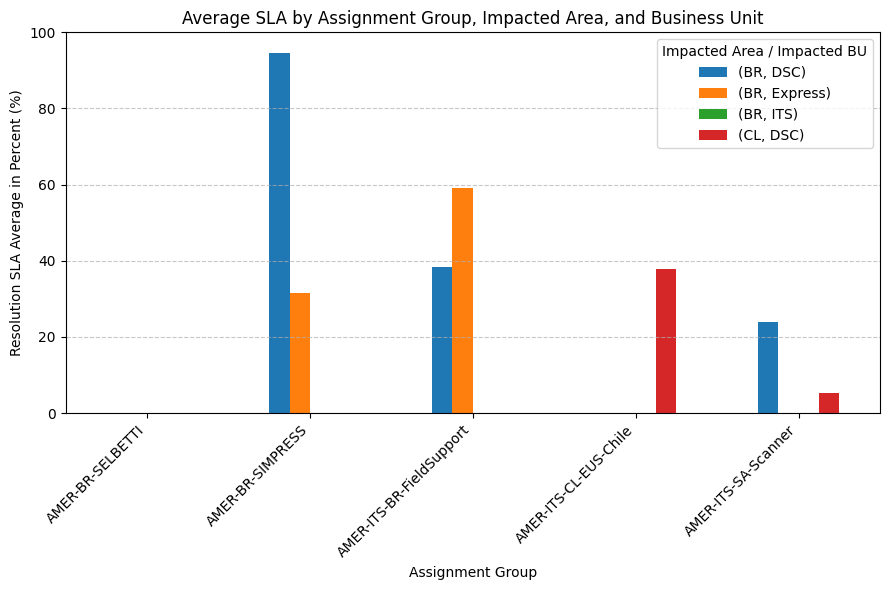

In [ ]:
"""
6.0 - SLA Business Percentage by Impacted Area, Business Unit, and Assignment Group
"""
# Extract the relevant columns
df_filtered = df[['SLA_Business_Percentage', 'Area', 'BU', 'Assignment_Group']]

# Group by 'Impacted Area', 'Impacted Business Unit' and 'Assignment Group' and calculate the average 'Resolution SLA Percentage'
df_grouped = df_filtered.groupby(['Area', 'BU', 'Assignment_Group']).mean().reset_index()

# Plot the data as a bar chart
plt.figure(figsize=(9, 6))
df_grouped.pivot(index='Assignment_Group', columns=['Area', 'BU'], values='SLA_Business_Percentage').plot(kind='bar', ax=plt.gca())

plt.title('Average SLA by Assignment Group, Impacted Area, and Business Unit')
plt.xlabel('Assignment Group').set_animated(True)   # Set the x-axis label
plt.ylabel('Resolution SLA Average in Percent (%)')
plt.legend(title='Impacted Area / Impacted BU')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.tight_layout()

# Show the graph
plt.show()

In [ ]:
"""
6.1 - Reporting describing the average SLA Business Percentage by Impacted Area, Business Unit, and Assignment Group
"""

# Group by 'Impacted Area', 'Impacted Business Unit' and 'Assignment Group' and calculate the average 'Resolution SLA Percentage'
df_6_1 = df.groupby(['Area', 'BU', 'Assignment_Group'])['SLA_Business_Percentage'].agg(
    Count='count',
    Mean='mean',
    Std='std',
    Min='min',
    q25=lambda x: x.quantile(0.25),
    Median='median',
    q75=lambda x: x.quantile(0.75),
    Max='max',
    Var='var',
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
print(df_6_1)


                                       Count       Mean         Std    Min  \
Area BU      Assignment_Group                                                
BR   DSC     AMER-BR-SELBETTI              2   0.000000    0.000000   0.00   
             AMER-BR-SIMPRESS             16  94.485625   94.115445   0.06   
             AMER-ITS-BR-FieldSupport     55  38.262364   86.823752   0.00   
             AMER-ITS-SA-Scanner           1  24.030000         NaN  24.03   
     Express AMER-BR-SIMPRESS              8  31.411250   29.235457   9.92   
             AMER-ITS-BR-FieldSupport     29  59.229655  123.777626   0.49   
     ITS     AMER-ITS-BR-FieldSupport      0        NaN         NaN    NaN   
CL   DSC     AMER-ITS-CL-EUS-Chile         2  37.865000   53.549197   0.00   
             AMER-ITS-SA-Scanner           1   5.270000         NaN   5.27   

                                           q25  Median       q75     Max  \
Area BU      Assignment_Group                                    

In [ ]:
"""
6.2 - Reporting describing the average SLA Business Percentage by Impacted Area, Business Unit, and Service
"""

# Group by 'Impacted Area', 'Impacted Business Unit' and 'Service' and calculate the average 'Resolution SLA Percentage'
df_6_2 = df.groupby(['Area', 'BU','Service'])['SLA_Business_Percentage'].agg(
    Count='count',
    Mean='mean',
    Std='std',
    Min='min',
    q25=lambda x: x.quantile(0.25),
    Median='median',
    q75=lambda x: x.quantile(0.75),
    Max='max',
    Var='var',
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
print(df_6_2)


                                              Count       Mean         Std  \
Area BU      Service                                                         
BR   DSC     CYBER DEFENSE CENTER                 1  50.000000         NaN   
             DESKTOP SUPPORT DSC LATAM           54  38.399630   87.507106   
             EXP TR END USER SUPPORT SERVICE      0        NaN         NaN   
             MDS                                  1   0.340000         NaN   
             PRINTER SUPPORT DSC LATAM           17  87.781176   94.977739   
             SCANNER SUPPORT DSC LATAM            1  24.030000         NaN   
     Express DESKTOP SUPPORT EXP LATAM           28  39.686429   66.346956   
             PRINTER SUPPORT EXP LATAM            9  95.303333  193.617297   
     ITS     DESKTOP SUPPORT DSC LATAM            0        NaN         NaN   
CL   DSC     EXP TR END USER SUPPORT SERVICE      1  75.730000         NaN   
             PRINTER SUPPORT DSC LATAM            1   0.000000  

## Other

In [ ]:
"""
??? - SLA Business Percentage by Impacted Area, Business Unit, and Assignment Group
"""
df_filtered = df[['SLA_Business_Percentage', 'Area', 'BU', 'Assignment_Group']]

df_mode = df_filtered.groupby(['Area', 'BU', 'Assignment_Group'])['SLA_Business_Percentage'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

df_mode = df_mode.sort_values(by=['Area', 'BU', 'Assignment_Group'])
df_mode


,Area,BU,Assignment_Group,SLA_Business_Percentage
0,BR,DSC,AMER-BR-SELBETTI,0.00
1,BR,DSC,AMER-BR-SIMPRESS,50.00
2,BR,DSC,AMER-ITS-BR-FieldSupport,50.00
3,BR,DSC,AMER-ITS-SA-Scanner,24.03
4,BR,Express,AMER-BR-SIMPRESS,9.92
5,BR,Express,AMER-ITS-BR-FieldSupport,0.49
6,BR,ITS,AMER-ITS-BR-FieldSupport,NaN
7,CL,DSC,AMER-ITS-CL-EUS-Chile,0.00
8,CL,DSC,AMER-ITS-SA-Scanner,5.27


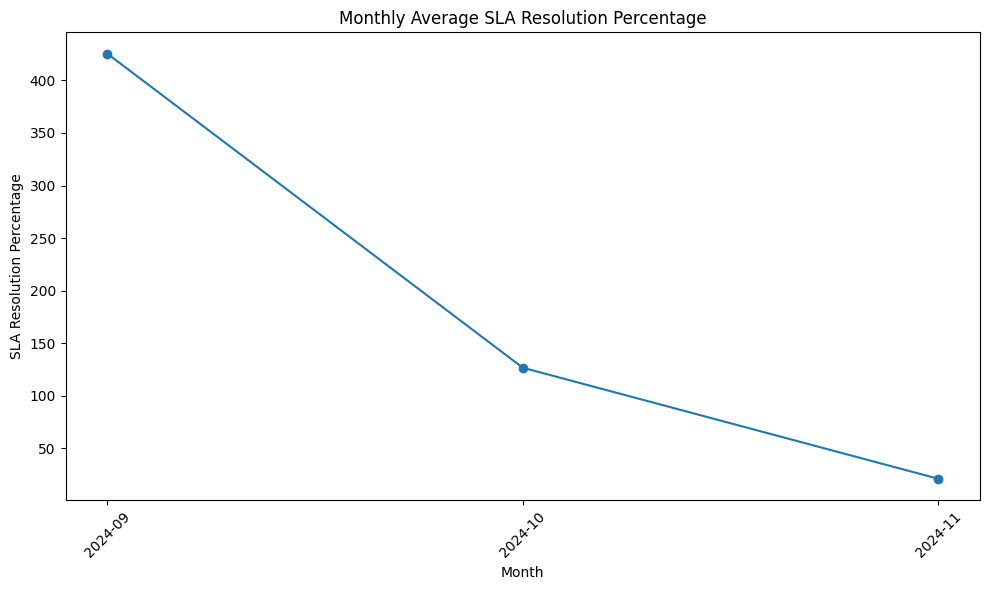

In [ ]:
# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por mês e calcular a média do percentual de SLA de resolução
df['month'] = df['Opened'].dt.to_period('M')
df_monthly = df.groupby('month')['SLA_Business_Percentage'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['month'].astype(str), df_monthly['SLA_Business_Percentage'], marker='o')
plt.xlabel('Month')
plt.ylabel('SLA Resolution Percentage')
plt.title('Monthly Average SLA Resolution Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


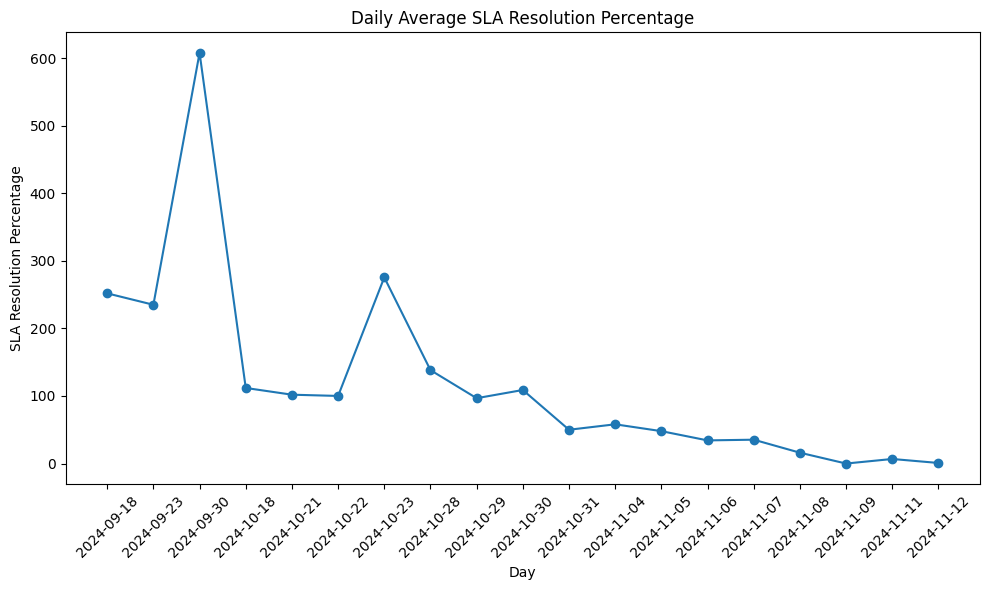

In [ ]:
# Daily Measurement

# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por dia e calcular a média do percentual de SLA de resolução
df['day'] = df['Opened'].dt.to_period('D')
df_daily = df.groupby('day')['SLA_Business_Percentage'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_daily['day'].astype(str), df_daily['SLA_Business_Percentage'], marker='o')
plt.xlabel('Day')
plt.ylabel('SLA Resolution Percentage')
plt.title('Daily Average SLA Resolution Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

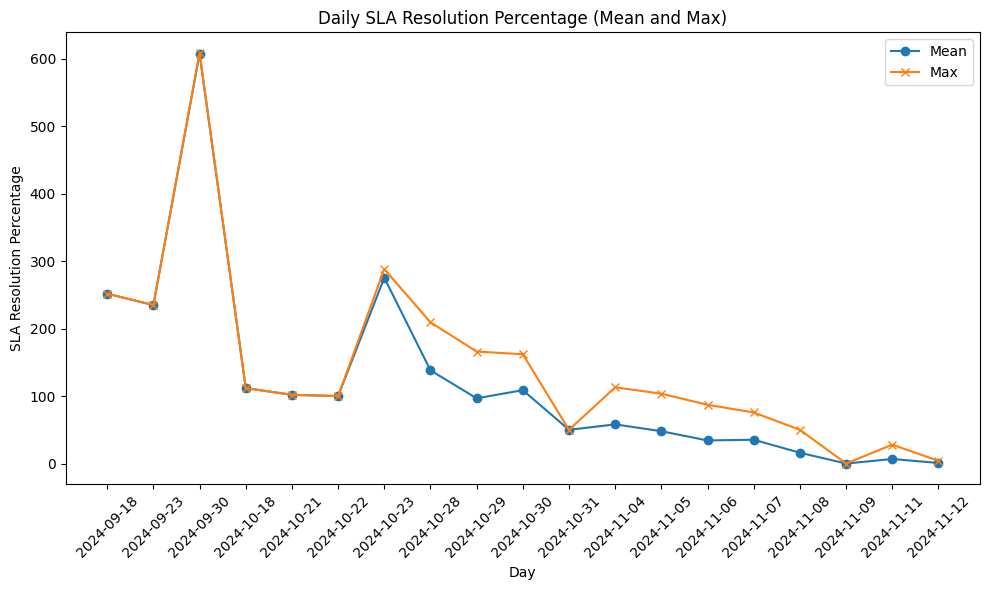

In [ ]:
# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por dia e calcular a média e a máxima do percentual de SLA de resolução
df['day'] = df['Opened'].dt.to_period('D')
df_daily = df.groupby('day')['SLA_Business_Percentage'].agg(['mean', 'max']).reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_daily['day'].astype(str), df_daily['mean'], marker='o', label='Mean')
plt.plot(df_daily['day'].astype(str), df_daily['max'], marker='x', label='Max')
plt.xlabel('Day')
plt.ylabel('SLA Resolution Percentage')
plt.title('Daily SLA Resolution Percentage (Mean and Max)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

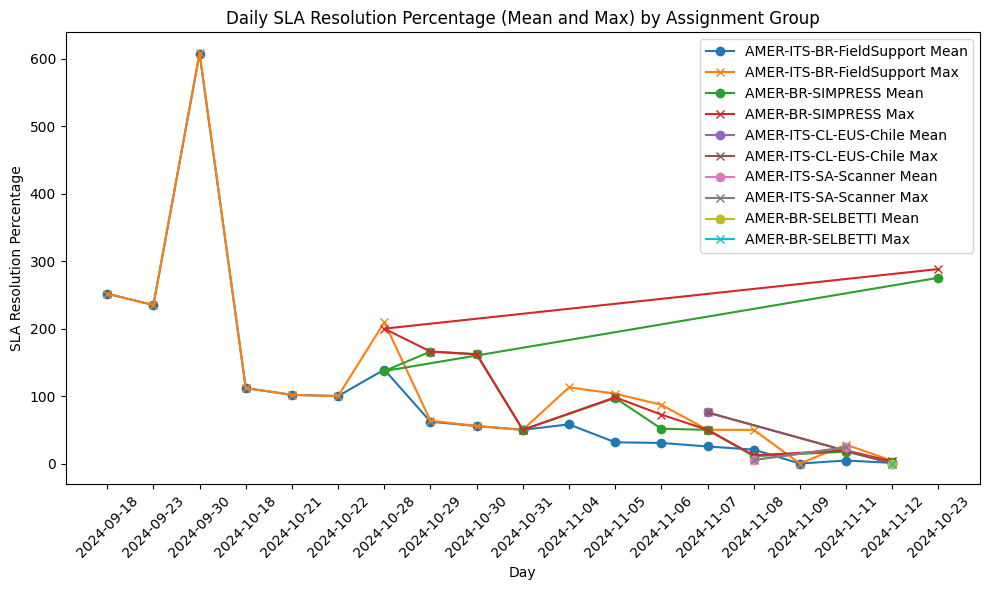

In [ ]:
# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por dia e Assignment_Group e calcular a média e a máxima do percentual de SLA de resolução
df['day'] = df['Opened'].dt.to_period('D')
df_daily = df.groupby(['day', 'Assignment_Group'])['SLA_Business_Percentage'].agg(['mean', 'max']).reset_index()

# Plotar o gráfico de linha para cada Assignment_Group
plt.figure(figsize=(10, 6))
for group in df_daily['Assignment_Group'].unique():
    group_data = df_daily[df_daily['Assignment_Group'] == group]
    plt.plot(group_data['day'].astype(str), group_data['mean'], marker='o', label=f'{group} Mean')
    plt.plot(group_data['day'].astype(str), group_data['max'], marker='x', label=f'{group} Max')

plt.xlabel('Day')
plt.ylabel('SLA Resolution Percentage')
plt.title('Daily SLA Resolution Percentage (Mean and Max) by Assignment Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

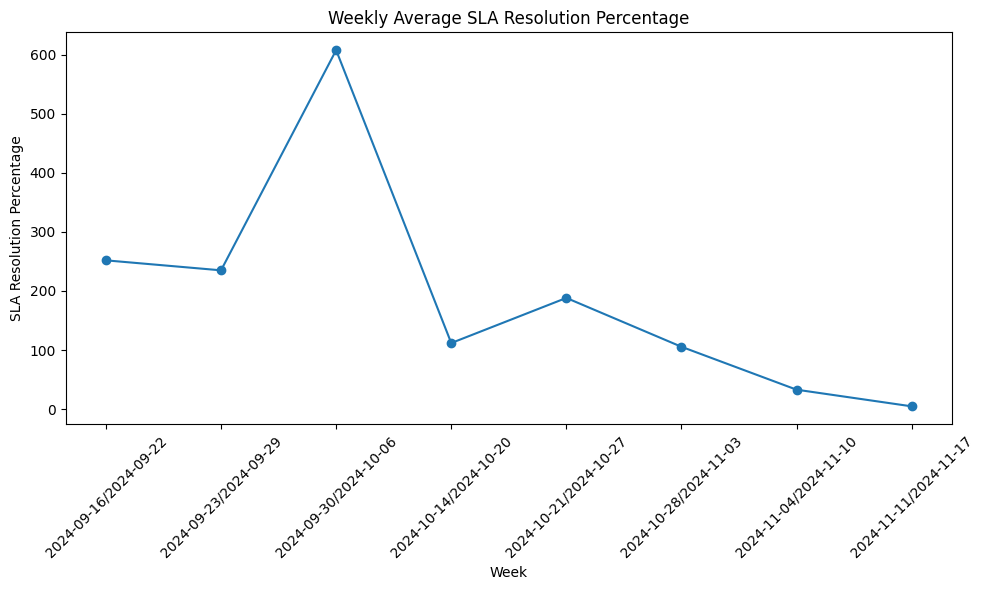

In [ ]:
# Weekly Measurement

# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por semana e calcular a média do percentual de SLA de resolução
df['week'] = df['Opened'].dt.to_period('W')
df_weekly = df.groupby('week')['SLA_Business_Percentage'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_weekly['week'].astype(str), df_weekly['SLA_Business_Percentage'], marker='o')
plt.xlabel('Week')
plt.ylabel('SLA Resolution Percentage')
plt.title('Weekly Average SLA Resolution Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

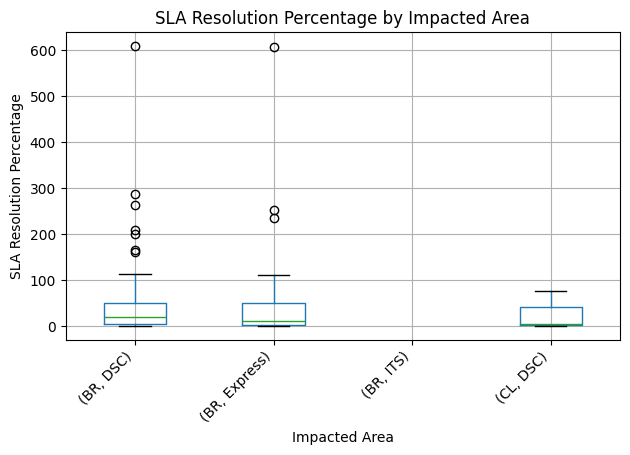

In [ ]:
# Plotar o box plot
plt.figure(figsize=(12, 8))
df.boxplot(column='SLA_Business_Percentage', by=['Area','BU'], grid=True)
plt.xlabel('Impacted Area')
plt.ylabel('SLA Resolution Percentage')
plt.title('SLA Resolution Percentage by Impacted Area')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# Calcular estatísticas descritivas
summary_table = df.groupby(['Area', 'BU','Assignment_Group'])['SLA_Business_Percentage'].describe()
#print(summary_table)
summary_table



count       mean         std    min  \
Area BU      Assignment_Group                                                
BR   DSC     AMER-BR-SELBETTI            2.0   0.000000    0.000000   0.00   
             AMER-BR-SIMPRESS           16.0  94.485625   94.115445   0.06   
             AMER-ITS-BR-FieldSupport   55.0  38.262364   86.823752   0.00   
             AMER-ITS-SA-Scanner         1.0  24.030000         NaN  24.03   
     Express AMER-BR-SIMPRESS            8.0  31.411250   29.235457   9.92   
             AMER-ITS-BR-FieldSupport   29.0  59.229655  123.777626   0.49   
     ITS     AMER-ITS-BR-FieldSupport    0.0        NaN         NaN    NaN   
CL   DSC     AMER-ITS-CL-EUS-Chile       2.0  37.865000   53.549197   0.00   
             AMER-ITS-SA-Scanner         1.0   5.270000         NaN   5.27   

                                           25%     50%       75%     max  
Area BU      Assignment_Group                                             
BR   DSC     AMER-BR-SELBETTI           0.0000   0.000    0.0000    0.00  
             AMER-BR-SIMPRESS          17.2975  59.475  163.0550  288.36  
             AMER-ITS-BR-FieldSupport   4.0050  12.600   46.3250  608.91  
             AMER-ITS-SA-Scanner       24.0300  24.030   24.0300   24.03  
     Express AMER-BR-SIMPRESS          10.1325  12.210   55.6275   74.29  
             AMER-ITS-BR-FieldSupport   1.4500   8.780   40.0000  606.44  
     ITS     AMER-ITS-BR-FieldSupport      NaN     NaN       NaN     NaN  
CL   DSC     AMER-ITS-CL-EUS-Chile     18.9325  37.865   56.7975   75.73  
             AMER-ITS-SA-Scanner        5.2700   5.270    5.2700    5.27

Para melhorar a análise e obter insights mais detalhados, você pode combinar várias opções e técnicas com o cálculo de estatísticas descritivas. Aqui estão algumas sugestões:

<Figure size 1200x800 with 0 Axes>

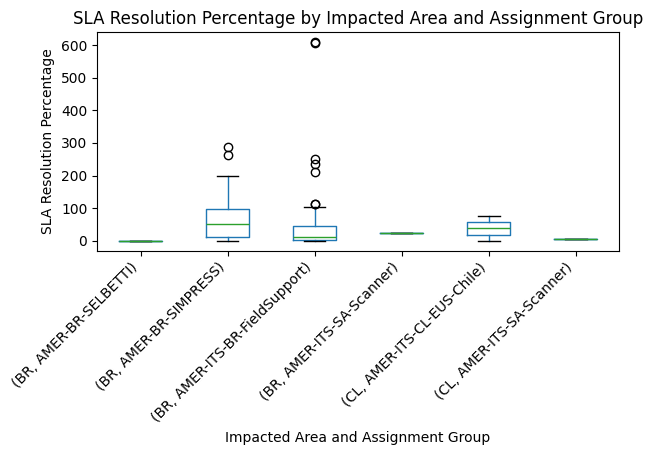

In [ ]:
# Plotar o box plot
plt.figure(figsize=(12, 8))
df.boxplot(column='SLA_Business_Percentage', by=['Area', 'Assignment_Group'], grid=False)
plt.xlabel('Impacted Area and Assignment Group')
plt.ylabel('SLA Resolution Percentage')
plt.title('SLA Resolution Percentage by Impacted Area and Assignment Group')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


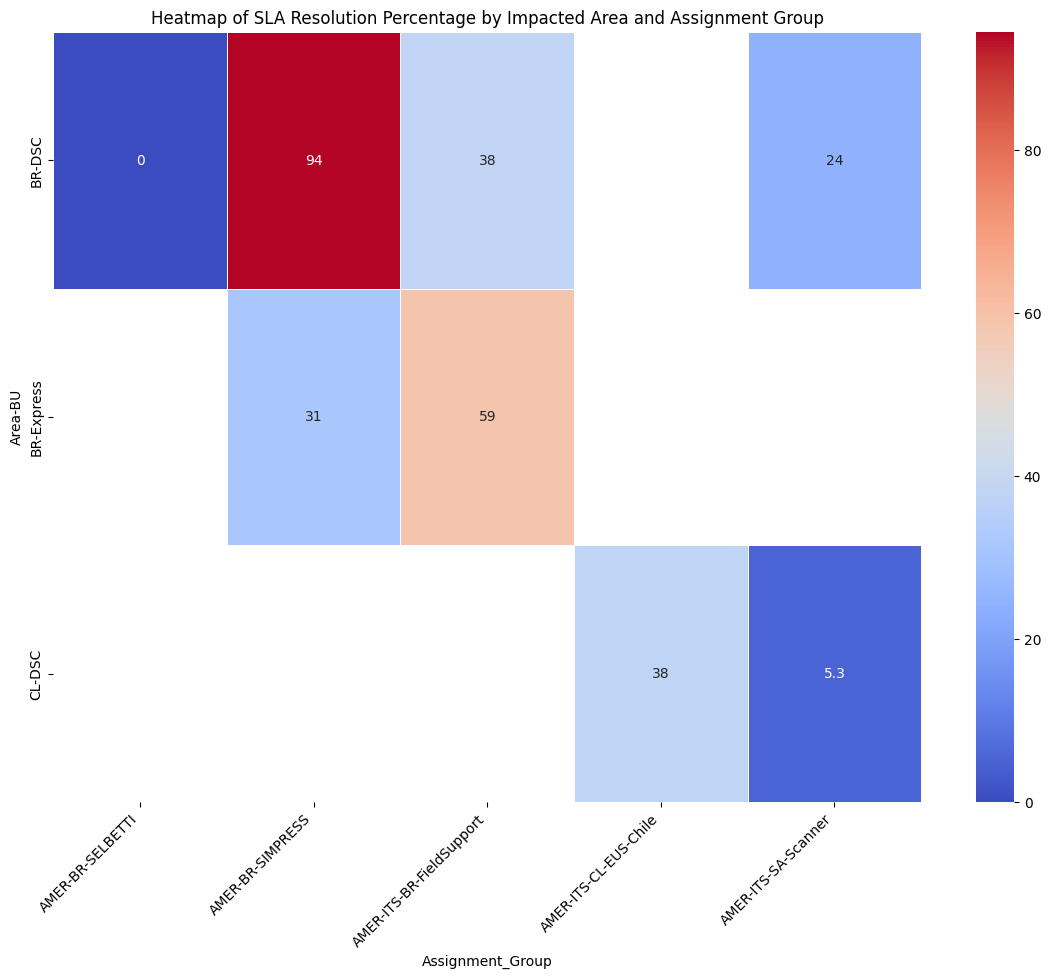

In [ ]:
# Criar uma tabela pivot para o heatmap
pivot_table = df.pivot_table(values='SLA_Business_Percentage', index=['Area','BU'], columns='Assignment_Group', aggfunc='mean')

# Plotar o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of SLA Resolution Percentage by Impacted Area and Assignment Group')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Identificar outliers usando o IQR
Q1 = df['SLA_Business_Percentage'].quantile(0.25)
Q3 = df['SLA_Business_Percentage'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['SLA_Business_Percentage'] < (Q1 - 1.5 * IQR)) | (df['SLA_Business_Percentage'] > (Q3 + 1.5 * IQR))]

#print(outliers)
outliers.head(5)



,Number,Caller,Incident_Type,Impact,Short_Description,Area,BU,Assignment_Group,Assigned,Assigned_Email,...,Time_Worked_Total,SLA_Duration,SLA_Business_Percentage,Days_Since_Opened,Days_Since_Updated,Days_Until_TRT,CI_CMDB_Status,month,day,week
0,INC61081319,Ana Carolina Baldoino de Sousa,Incident,User(s),BR/DSC/OUTRO | OTRO Carregador parou de funcionar,BR,DSC,AMER-ITS-BR-FieldSupport,Carlos Antonio Gomes Silva,carlos.a.g.silva@dhl.com,...,1260,3695244,608.91,42,0,-36.0,(empty),2024-09,2024-09-30,2024-09-30/2024-10-06
25,INC60986681,Elizeu Cunha,Request for Standard Change,None / Minor,BR - EXP - necessito enviar a manutenção de um...,BR,Express,AMER-ITS-BR-FieldSupport,Felipe Giannini,felipe.giannini@dhl.com,...,1500,4309518,234.93,50,0,-29.0,(empty),2024-09,2024-09-23,2024-09-23/2024-09-29
80,INC61081950,Marcelo Ferreira,Incident,User(s),BR - EXP - Impressão com falha,BR,Express,AMER-ITS-BR-FieldSupport,Felipe Giannini,felipe.giannini@dhl.com,...,1320,3690794,606.44,42,0,-36.0,(empty),2024-09,2024-09-30,2024-09-30/2024-10-06
81,INC61456636,Marcelo Pessoa,Incident,User(s),BR/DSC/Printer - Impressora não imprime | La i...,BR,DSC,AMER-BR-SIMPRESS,Arthur da Fonseca Junior,arthur.da_fonseca_junior@dhl.com,...,300,1209601,200.00,15,4,-9.0,Others,2024-10,2024-10-28,2024-10-28/2024-11-03
82,INC60926808,Marcos Garcia,Request for Standard Change,None / Minor,BR - EXP - 10 teclados e 10 mouses para suprir...,BR,Express,AMER-ITS-BR-FieldSupport,Rick Souza,rick.souza@dhl.com,...,6480,4718468,251.83,54,0,-34.0,(empty),2024-09,2024-09-18,2024-09-16/2024-09-22


In [ ]:
# Segmentar por 'Área Impactada' e 'Unidade de Negócio Impactada'
segment_analysis = df.groupby(['Area', 'BU', 'Service'])['SLA_Business_Percentage'].describe()
#print(segment_analysis)
segment_analysis

count       mean         std  \
Area BU      Service                                                         
BR   DSC     CYBER DEFENSE CENTER               1.0  50.000000         NaN   
             DESKTOP SUPPORT DSC LATAM         54.0  38.399630   87.507106   
             EXP TR END USER SUPPORT SERVICE    0.0        NaN         NaN   
             MDS                                1.0   0.340000         NaN   
             PRINTER SUPPORT DSC LATAM         17.0  87.781176   94.977739   
             SCANNER SUPPORT DSC LATAM          1.0  24.030000         NaN   
     Express DESKTOP SUPPORT EXP LATAM         28.0  39.686429   66.346956   
             PRINTER SUPPORT EXP LATAM          9.0  95.303333  193.617297   
     ITS     DESKTOP SUPPORT DSC LATAM          0.0        NaN         NaN   
CL   DSC     EXP TR END USER SUPPORT SERVICE    1.0  75.730000         NaN   
             PRINTER SUPPORT DSC LATAM          1.0   0.000000         NaN   
             SCANNER SUPPORT DSC LATAM          1.0   5.270000         NaN   

                                                min     25%     50%      75%  \
Area BU      Service                                                           
BR   DSC     CYBER DEFENSE CENTER             50.00  50.000  50.000   50.000   
             DESKTOP SUPPORT DSC LATAM         0.00   4.120  13.480   40.570   
             EXP TR END USER SUPPORT SERVICE    NaN     NaN     NaN      NaN   
             MDS                               0.34   0.340   0.340    0.340   
             PRINTER SUPPORT DSC LATAM         0.00  13.290  50.000  162.060   
             SCANNER SUPPORT DSC LATAM        24.03  24.030  24.030   24.030   
     Express DESKTOP SUPPORT EXP LATAM         0.49   1.445   8.285   39.715   
             PRINTER SUPPORT EXP LATAM         9.92  10.190  12.220   72.510   
     ITS     DESKTOP SUPPORT DSC LATAM          NaN     NaN     NaN      NaN   
CL   DSC     EXP TR END USER SUPPORT SERVICE  75.73  75.730  75.730   75.730   
             PRINTER SUPPORT DSC LATAM         0.00   0.000   0.000    0.000   
             SCANNER SUPPORT DSC LATAM         5.27   5.270   5.270    5.270   

                                                 max  
Area BU      Service                                  
BR   DSC     CYBER DEFENSE CENTER              50.00  
             DESKTOP SUPPORT DSC LATAM        608.91  
             EXP TR END USER SUPPORT SERVICE     NaN  
             MDS                                0.34  
             PRINTER SUPPORT DSC LATAM        288.36  
             SCANNER SUPPORT DSC LATAM         24.03  
     Express DESKTOP SUPPORT EXP LATAM        251.83  
             PRINTER SUPPORT EXP LATAM        606.44  
     ITS     DESKTOP SUPPORT DSC LATAM           NaN  
CL   DSC     EXP TR END USER SUPPORT SERVICE   75.73  
             PRINTER SUPPORT DSC LATAM          0.00  
             SCANNER SUPPORT DSC LATAM          5.27